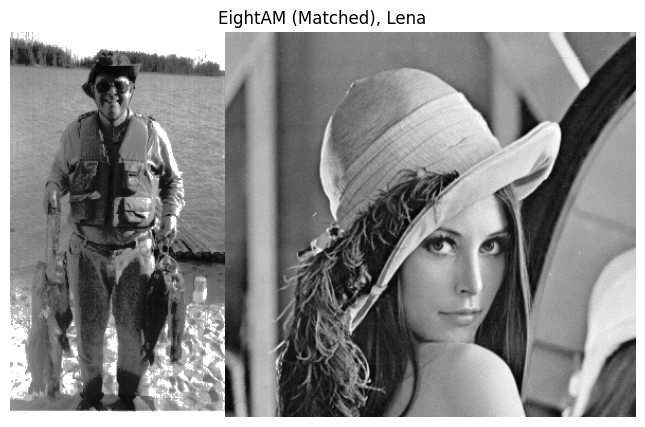

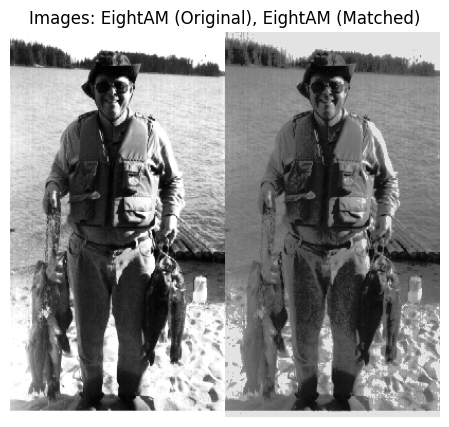

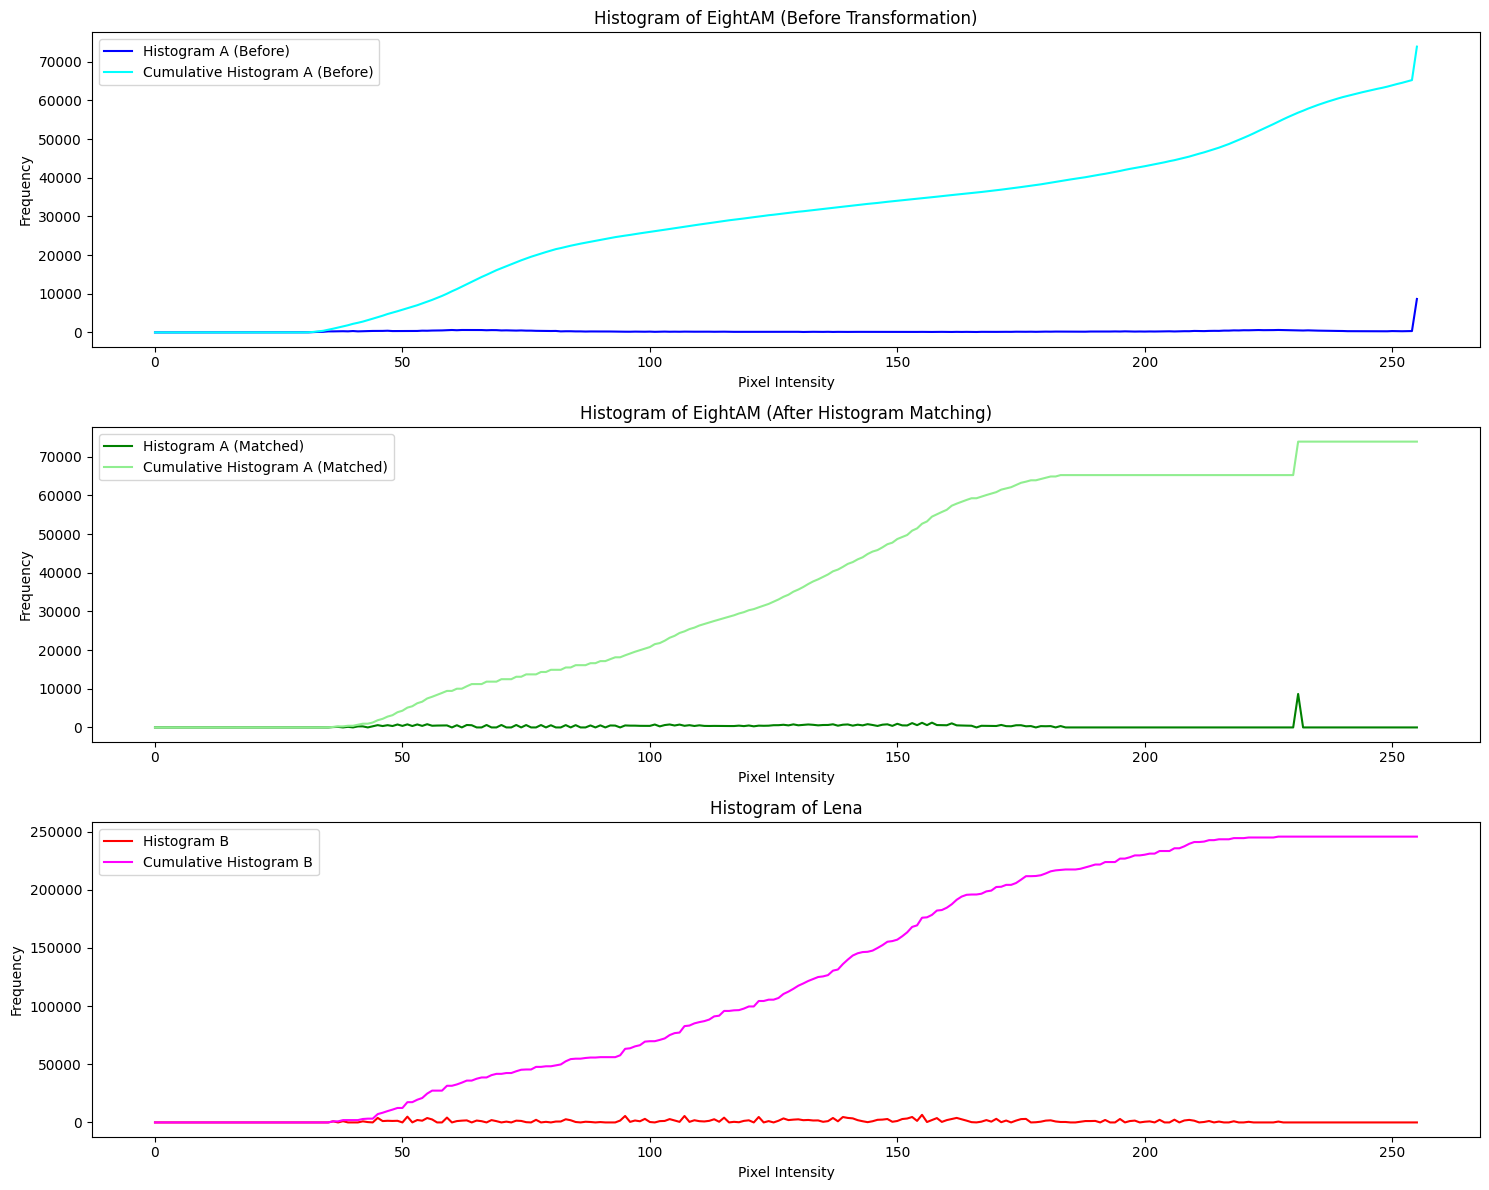

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import exposure

# Read the images using Pillow
A = Image.open('EightAM.png')
B = Image.open('LENA.png')

# Convert images to NumPy arrays
A = np.array(A)
B = np.array(B)

# Convert both images to grayscale
A_gray = np.array(Image.fromarray(A).convert('L'))
B_gray = np.array(Image.fromarray(B).convert('L'))

# Get histograms for EightAM before transformation
ha_before, _ = np.histogram(A_gray.flatten(), bins=256, range=[0, 256])
cha_before = np.cumsum(ha_before)

# Resize images to the same height
height_A, width_A = A_gray.shape[:2]
height_B, width_B = B_gray.shape[:2]

# Determine the new height and maintain aspect ratio
new_height = min(height_A, height_B)
A_resized = np.array(Image.fromarray(A_gray).resize((int(width_A * new_height / height_A), new_height)))
B_resized = np.array(Image.fromarray(B_gray).resize((int(width_B * new_height / height_B), new_height)))

# Get histograms for EightAM after transformation
ha_after, _ = np.histogram(A_resized.flatten(), bins=256, range=[0, 256])
cha_after = np.cumsum(ha_after)

# Match the histogram of EightAM to that of Lena
A_matched = exposure.match_histograms(A_resized, B_resized, channel_axis=None)

# Get histogram for Lena image
hb, _ = np.histogram(B_gray.flatten(), bins=256, range=[0, 256])
chb = np.cumsum(hb)

# Get histogram for EightAM after matching
ha_matched, _ = np.histogram(A_matched.flatten(), bins=256, range=[0, 256])
cha_matched = np.cumsum(ha_matched)

# Show the images side-by-side
combined_image1 = np.hstack(( A_matched, B_resized))
plt.figure(figsize=(15, 5))
plt.imshow(np.clip(combined_image1, 0, 255).astype(np.uint8), cmap='gray')
plt.title('EightAM (Matched), Lena')
plt.axis('off')
plt.show()

combined_image2 = np.hstack((A_resized, A_matched))
plt.figure(figsize=(15, 5))
plt.imshow(np.clip(combined_image2, 0, 255).astype(np.uint8), cmap='gray')
plt.title('Images: EightAM (Original), EightAM (Matched)')
plt.axis('off')
plt.show()

# Plot histograms
plt.figure(figsize=(15, 12))

# Histogram for EightAM before transformation
plt.subplot(3, 1, 1)
plt.plot(ha_before, color='blue', label='Histogram A (Before)')
plt.plot(cha_before, color='cyan', label='Cumulative Histogram A (Before)')
plt.title('Histogram of EightAM (Before Transformation)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

# Histogram for EightAM after matching
plt.subplot(3, 1, 2)
plt.plot(ha_matched, color='green', label='Histogram A (Matched)')
plt.plot(cha_matched, color='lightgreen', label='Cumulative Histogram A (Matched)')
plt.title('Histogram of EightAM (After Histogram Matching)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

# Histogram for Lena image
plt.subplot(3, 1, 3)
plt.plot(hb, color='red', label='Histogram B')
plt.plot(chb, color='magenta', label='Cumulative Histogram B')
plt.title('Histogram of Lena')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()